In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# download MNIST
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
def show_image(img):
  plt.imshow(img, cmap='binary');

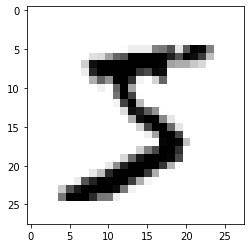

In [ ]:
show_image(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=46)
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)

CNN Modelling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential([
                    Conv2D(16, 3, activation='selu', input_shape=[28, 28, 1]),
                    Dropout(0.2),
                    MaxPool2D(2),
                    Conv2D(64, 3, activation='selu'),
                    Dropout(0.2),
                    MaxPool2D(2),
                    Flatten(),
                    Dropout(0.2),
                    Dense(128, activation='relu'),
                    Dropout(0.2),
                    Dense(10, activation='softmax')

])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, 
                    y_train_ohe, 
                    epochs=30, 
                    batch_size=128, 
                    validation_data=(X_val, y_val_ohe))

Epoch 1/30
399/399 [==============================] - 3s 6ms/step - loss: 0.2864 - accuracy: 0.9118 - val_loss: 0.0816 - val_accuracy: 0.9756
Epoch 2/30
399/399 [==============================] - 2s 5ms/step - loss: 0.0948 - accuracy: 0.9712 - val_loss: 0.0585 - val_accuracy: 0.9820
Epoch 3/30
399/399 [==============================] - 2s 5ms/step - loss: 0.0725 - accuracy: 0.9779 - val_loss: 0.0501 - val_accuracy: 0.9832
Epoch 4/30
399/399 [==============================] - 2s 6ms/step - loss: 0.0600 - accuracy: 0.9811 - val_loss: 0.0435 - val_accuracy: 0.9857
Epoch 5/30
399/399 [==============================] - 2s 5ms/step - loss: 0.0517 - accuracy: 0.9840 - val_loss: 0.0386 - val_accuracy: 0.9876
Epoch 6/30
399/399 [==============================] - 2s 5ms/step - loss: 0.0460 - accuracy: 0.9854 - val_loss: 0.0337 - val_accuracy: 0.9892
Epoch 7/30
399/399 [==============================] - 2s 5ms/step - loss: 0.0406 - accuracy: 0.9870 - val_loss: 0.0381 - val_accuracy: 0.9882
Epoch 

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

metrics = pd.DataFrame(history.history)

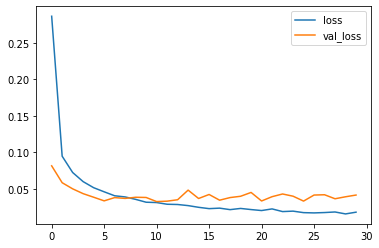

In [ ]:
metrics[['loss', 'val_loss']].plot();

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       1.00      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

